In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# There are five stations, each stored on different sheets
# Download data for each station (remove first two rows as they do not contain data)
suva_data = pd.read_excel('Daily Rainfall Data.xlsx', sheet_name='Suva_daily', skiprows=2, header=None)
lautoka_data = pd.read_excel('Daily Rainfall Data.xlsx', sheet_name='Lautoka_daily', skiprows=2, header=None)
savusavu_airport_data = pd.read_excel('Daily Rainfall Data.xlsx', sheet_name='Savusavu_Airport_daily', skiprows=2, header=None)
labasa_airport_data = pd.read_excel('Daily Rainfall Data.xlsx', sheet_name='Labasa_Airport_daily', skiprows=2, header=None)
penang_data = pd.read_excel('Daily Rainfall Data.xlsx', sheet_name='Penang_daily', skiprows=2, header=None)

In [5]:
# Update headers
suva_data.columns = ['date', 'daily_rainfall_mm','accumulation_period_days']
lautoka_data.columns = ['date', 'daily_rainfall_mm','accumulation_period_days']
savusavu_airport_data.columns = ['date', 'daily_rainfall_mm','accumulation_period_days']
labasa_airport_data.columns = ['date', 'daily_rainfall_mm','accumulation_period_days']
penang_data.columns = ['date', 'daily_rainfall_mm','accumulation_period_days']

In [7]:
# Check for duplicate dates
print(sum(suva_data.duplicated(subset=['date'])))
print(sum(lautoka_data.duplicated(subset=['date'])))
print(sum(savusavu_airport_data.duplicated(subset=['date'])))
print(sum(labasa_airport_data.duplicated(subset=['date'])))
print(sum(penang_data.duplicated(subset=['date'])))

# No duplicate dates

0
0
0
0
0


In [9]:
# Define the date range (same for all datasets)
start_date = '1990-01-01'
end_date = '2022-12-31'
date_range = pd.date_range(start=start_date, end=end_date)
# Check for missing dates
print(set(date_range) - set(suva_data['date']))
print(set(date_range) - set(lautoka_data['date']))
print(set(date_range) - set(savusavu_airport_data['date']))
print(set(date_range) - set(labasa_airport_data['date']))
print(set(date_range) - set(penang_data['date']))

# No missing dates 

set()
set()
set()
set()
set()


In [11]:
# Split multi-day data across days (check that the previous or following days are blank)
suva_data[suva_data.accumulation_period_days > 1]

,date,daily_rainfall_mm,accumulation_period_days
10210,2017-12-15,51.2,2.0
10275,2018-02-18,0.0,2.0
10568,2018-12-08,13.4,2.0
10604,2019-01-13,9.2,2.0
11892,2022-07-24,3.0,2.0


In [15]:
# Write a function to check that the days before store NaN values where the accumulation_period_days > 1
for ind in suva_data[suva_data.accumulation_period_days > 1].index:
    days = suva_data[suva_data.accumulation_period_days > 1].accumulation_period_days[ind]
    print(np.isnan((suva_data[ind - int(days-1):ind]).daily_rainfall_mm))

10209    True
Name: daily_rainfall_mm, dtype: bool
10274    True
Name: daily_rainfall_mm, dtype: bool
10567    True
Name: daily_rainfall_mm, dtype: bool
10603    True
Name: daily_rainfall_mm, dtype: bool
11891    True
Name: daily_rainfall_mm, dtype: bool


In [19]:
# Above, we found that all days prior to accumulation are NaN (and that all days after are not) 
# So we can split data collected where accumulation_period_days > 2 between the day recorded and the previous day
for ind in suva_data[suva_data.accumulation_period_days > 1].index:
    days = suva_data[suva_data.accumulation_period_days > 1].accumulation_period_days[ind]
    rainfall_data = suva_data[suva_data.accumulation_period_days > 1].daily_rainfall_mm[ind]
    suva_data.loc[ind - int(days-1):ind+1, "daily_rainfall_mm"] = rainfall_data/days

In [21]:
# Check for blank rainfall records after splitting multi-day data (to be aware of missing dates)
suva_data[np.isnan(suva_data.daily_rainfall_mm) == True]

,date,daily_rainfall_mm,accumulation_period_days
8400,2012-12-31,NaN,NaN
9328,2015-07-17,NaN,NaN
9329,2015-07-18,NaN,NaN
9952,2017-04-01,NaN,NaN
10231,2018-01-05,NaN,1.0
10232,2018-01-06,NaN,1.0
10233,2018-01-07,NaN,1.0
10379,2018-06-02,NaN,1.0
10617,2019-01-26,NaN,NaN
11352,2021-01-30,NaN,NaN


In [35]:
# Use record daily rainfall from BOM to check values above, and also check for negative rainfall values

# No negative rainfall values according to min value = 0
print(min(suva_data.daily_rainfall_mm) < 0)
# Maximum rainfall ever recorded in a 24h period was 1,825mm in Foc Foc, La Réunion on 7-8 Jan 1966
# http://www.bom.gov.au/water/designRainfalls/rainfallEvents/worldRecRainfall.shtml
# Maximum does not exceed this according to max value = 272mm
print(max(suva_data.daily_rainfall_mm))
print(max(suva_data.daily_rainfall_mm) > 1825)

False
272.0
False


In [51]:
suva_data

,date,daily_rainfall_mm,accumulation_period_days
0,1990-01-01,0.0,1.0
1,1990-01-02,0.0,1.0
2,1990-01-03,0.0,1.0
3,1990-01-04,5.8,1.0
4,1990-01-05,7.6,1.0
...,...,...,...
12048,2022-12-27,22.9,1.0
12049,2022-12-28,0.0,1.0
12050,2022-12-29,60.2,1.0
12051,2022-12-30,1.4,1.0


<Axes: xlabel='date'>

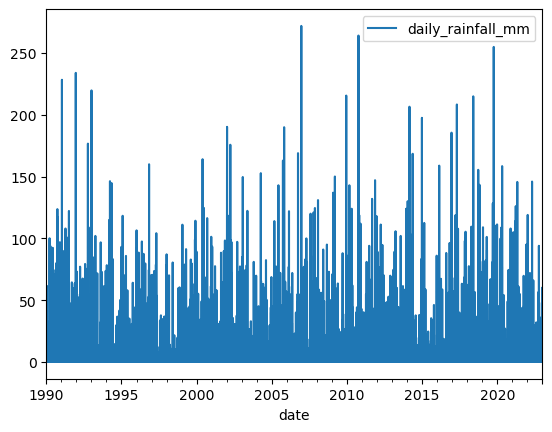

In [49]:
suva_data.plot('date', 'daily_rainfall_mm')

In [25]:
# Save data
os.mkdir('')
suva_data.to_csv('suva_data.csv', index=False)

<Axes: >

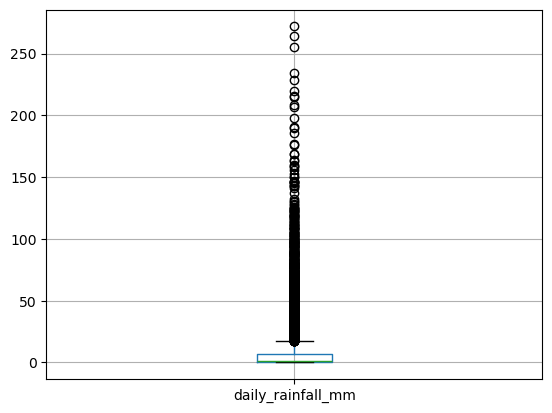

In [17]:
# Box plot to check for outliers
suva_data.boxplot(column='daily_rainfall_mm')

In [ ]:
# Where outliers exist, check flooding reports

In [ ]:
# Repeat sense checks of records based on monthly and annual data totals